# Clustering on speed dating dataset

Dataset taken from https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

All of the data transformations done in the next cells are taken from a previous exercise with this dataset: https://github.com/jcasarmiento/CrossValidation

In [18]:
df=pd.read_csv("speeddating.csv",header=0)
df=df.drop(["expected_num_interested_in_me","expected_num_matches","shared_interests_o","shared_interests_partner","ambitous_o","ambition_partner"],axis=1)
df=df.dropna(how="any")
to_drop=["has_null","wave","d_age","d_d_age","samerace","d_importance_same_race","d_importance_same_religion","d_pref_o_attractive","d_pref_o_sincere",\
        "d_pref_o_intelligence","d_pref_o_funny","d_pref_o_ambitious","d_pref_o_shared_interests","d_attractive_o","d_sinsere_o","d_intelligence_o",\
        "d_funny_o","d_ambitous_o","d_shared_interests_o","d_attractive_important","d_sincere_important","d_intellicence_important","d_funny_important",\
        "d_ambtition_important","d_shared_interests_important","d_attractive","d_sincere","d_intelligence","d_funny","d_ambition","d_attractive_partner",\
        "d_sincere_partner","d_intelligence_partner","d_funny_partner","d_ambition_partner","d_shared_interests_partner","d_sports","d_tvsports","d_exercise",\
        "d_dining","d_museums","d_art","d_hiking","d_gaming","d_clubbing","d_reading","d_tv","d_theater","d_movies","d_concerts","d_music","d_shopping","d_yoga",\
        "d_interests_correlate","expected_happy_with_sd_people","d_expected_num_interested_in_me","d_expected_num_matches","like","guess_prob_liked","d_like",\
        "d_guess_prob_liked","met","decision","decision_o"]
df=df.drop(to_drop,axis=1)
y = df.pop('match')  # labels correspond to column match
df = pd.get_dummies(df,drop_first=True)  #data is rest of columns and there is still categorical colums

In [19]:
y.shape,type(y),df.shape,type(df)

((7079,), pandas.core.series.Series, (7079, 313), pandas.core.frame.DataFrame)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(df)
X

array([[-1.51065932,  0.19618885, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       [-1.51065932, -1.23913653, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       [-1.51065932, -0.95207146, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       ...,
       [-0.37112527, -0.66500638, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ]])

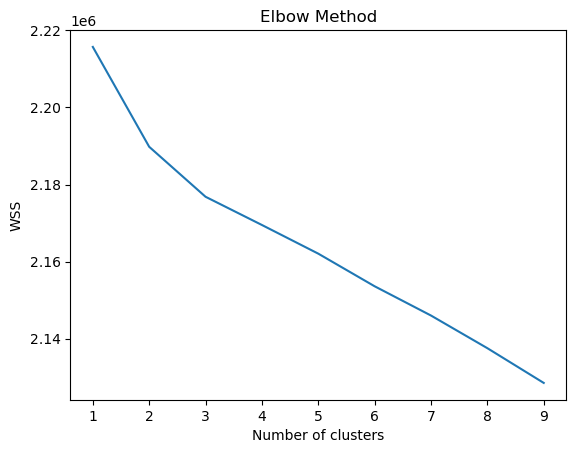

In [21]:
from sklearn.cluster import KMeans

WSS = []
for k in range(1,10,1):
    k_means=KMeans(n_clusters=k, random_state=0,n_init=10)
    k_means.fit(X)
    WSS.append(k_means.inertia_)

plt.plot(range(1,10,1), WSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

For K-means, optimal k is between 2 and 3

In [26]:
k_means=KMeans(n_clusters=2, random_state=0,n_init=10)
k_means.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [27]:
centroids=k_means.cluster_centers_
df_centroids=pd.DataFrame(centroids,columns=df.columns)
df_centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 313 entries, age to d_expected_happy_with_sd_people_b'[7-10]'
dtypes: float64(313)
memory usage: 5.0 KB


In [29]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y=pd.get_dummies(y,drop_first=True)

In [33]:
from sklearn.metrics import confusion_matrix,silhouette_score

confusion_matrix(y,k_means.labels_),silhouette_score(X,k_means.labels_)

(array([[2967, 2878],
        [ 571,  663]], dtype=int64),
 0.017227805304637068)